#Dataset


In [1]:
import kagglehub

path = kagglehub.dataset_download("faizalkarim/flood-area-segmentation")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/faizalkarim/flood-area-segmentation/versions/1


In [2]:
import os
from PIL import Image
import numpy as np
import shutil

imgs = []
masks = []

dir = '/content/imagenes'
if os.path.exists(dir):
  shutil.rmtree(dir)
  print(f"El directorio {dir} ha sido eliminado.")
os.makedirs(dir)

dir = '/content/mascaras'
if os.path.exists(dir):
  shutil.rmtree(dir)
  print(f"El directorio {dir} ha sido eliminado.")
os.makedirs(dir)

for root, dirs, files in os.walk(path):
  for file in files:
    print(os.path.join(root, file))

    if file.lower().endswith('.jpg'):
      image = Image.open(os.path.join(root, file))
      image = image.convert('RGB')
      image = image.resize((394, 394))
      image = np.array(image)
      image = image.astype(np.float32)
      image = image / 255.0

      npy_path = os.path.join('/content/imagenes', os.path.splitext(file)[0] + '.npy')
      np.save(npy_path, image)

      imgs.append(npy_path)

    elif file.lower().endswith('.png'):
      image = Image.open(os.path.join(root, file))
      image = image.resize((394, 394))
      image = np.array(image)
      image = (image > 127).astype(np.uint8)
      npy_path = os.path.join('/content/mascaras', os.path.splitext(file)[0] + '.npy')
      np.save(npy_path, image)

      masks.append(npy_path)

imgs = sorted(imgs)
masks = sorted(masks)

print(len(imgs), len(masks))

El directorio /content/imagenes ha sido eliminado.
El directorio /content/mascaras ha sido eliminado.
/root/.cache/kagglehub/datasets/faizalkarim/flood-area-segmentation/versions/1/metadata.csv
/root/.cache/kagglehub/datasets/faizalkarim/flood-area-segmentation/versions/1/Image/2025.jpg
/root/.cache/kagglehub/datasets/faizalkarim/flood-area-segmentation/versions/1/Image/2007.jpg
/root/.cache/kagglehub/datasets/faizalkarim/flood-area-segmentation/versions/1/Image/1064.jpg
/root/.cache/kagglehub/datasets/faizalkarim/flood-area-segmentation/versions/1/Image/3000.jpg
/root/.cache/kagglehub/datasets/faizalkarim/flood-area-segmentation/versions/1/Image/3009.jpg
/root/.cache/kagglehub/datasets/faizalkarim/flood-area-segmentation/versions/1/Image/1068.jpg
/root/.cache/kagglehub/datasets/faizalkarim/flood-area-segmentation/versions/1/Image/1025.jpg
/root/.cache/kagglehub/datasets/faizalkarim/flood-area-segmentation/versions/1/Image/3096.jpg
/root/.cache/kagglehub/datasets/faizalkarim/flood-area

In [3]:
import numpy as np

# Ruta del archivo .npy
file_path = masks[0]

# Cargar el archivo .npy
img_array = np.load(file_path)

# Cambiar las opciones de impresión para mostrar todos los elementos
np.set_printoptions(threshold=np.inf)

# Ver los valores de los píxeles completos
print(img_array)

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

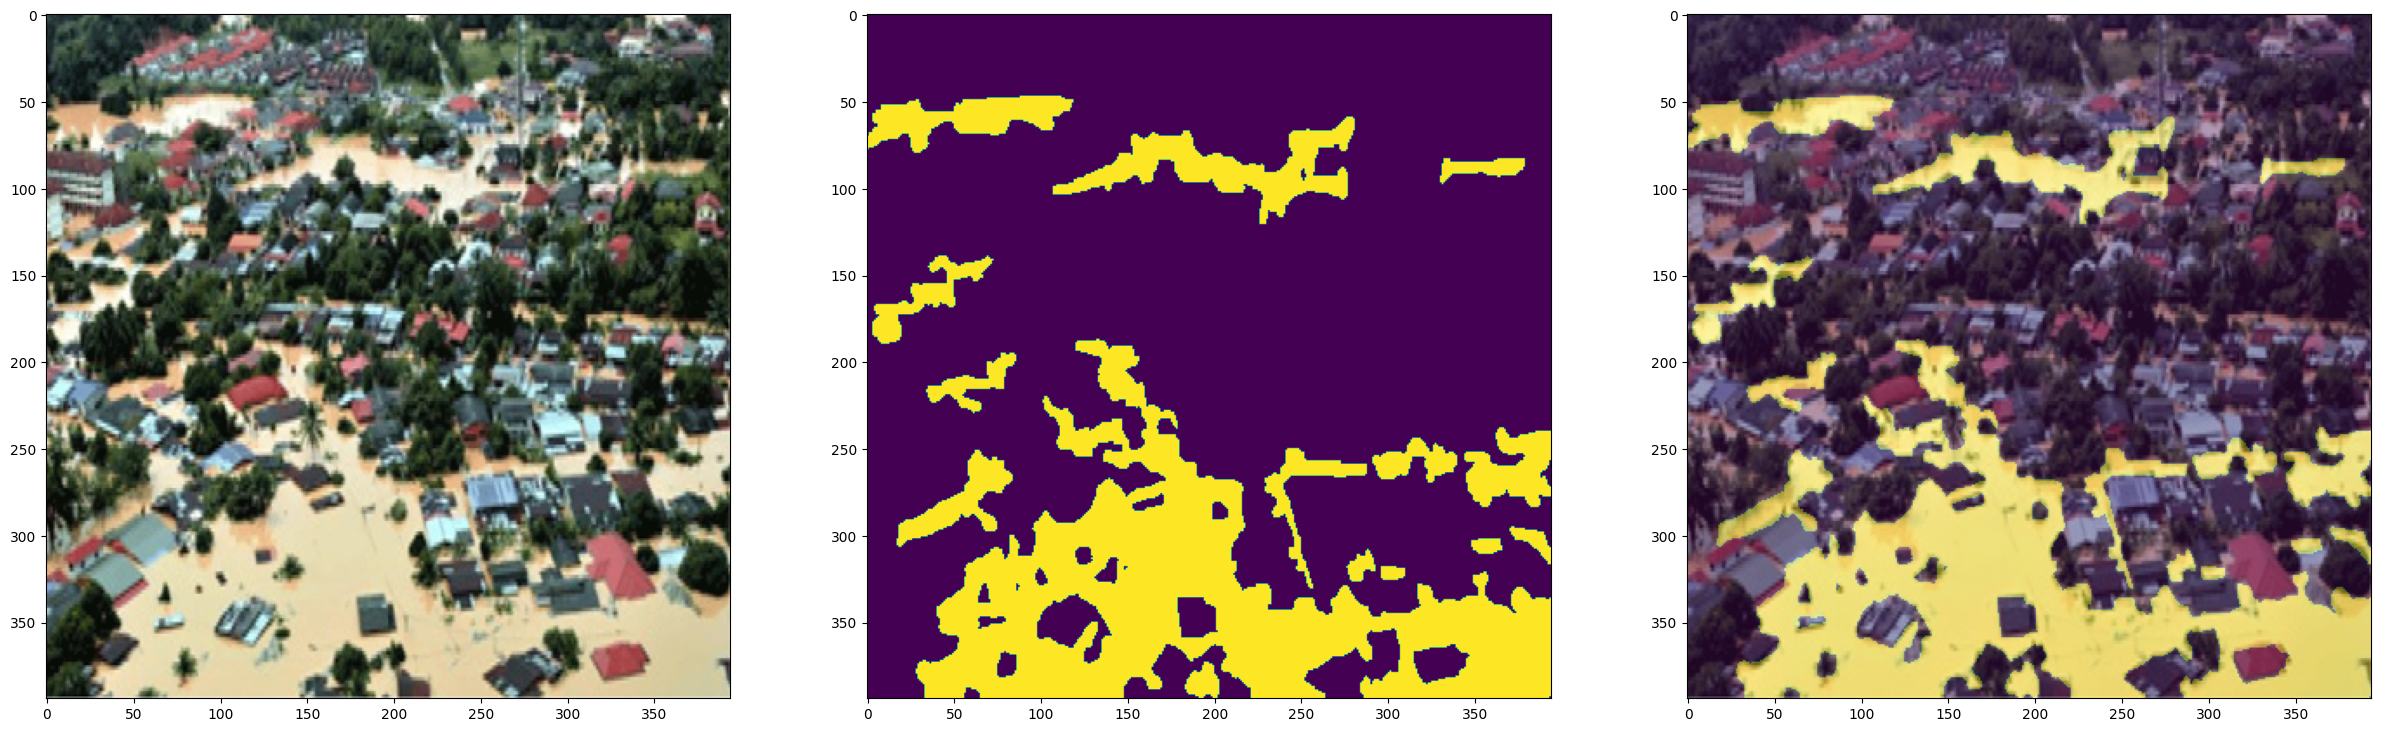

In [4]:
import matplotlib.pyplot as plt
import numpy as np

for i in range(1):
  fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(30,10))
  img = np.load(imgs[i])
  mask = np.load(masks[i])
  ax1.imshow(img)
  ax2.imshow(mask)
  ax3.imshow(img)
  ax3.imshow(mask, alpha=0.4)
  plt.show()

In [5]:
img.shape, img.dtype, img.max(), img.min()

((394, 394, 3), dtype('float32'), 1.0, 0.0)

In [6]:
mask.shape, mask.dtype, mask.max(), mask.min()

((394, 394), dtype('uint8'), 1, 0)

#UNet

In [7]:
import torch
import torch.nn.functional as F

def conv3x3_bn(ci, co):
    return torch.nn.Sequential(
        torch.nn.Conv2d(ci, co, 3, padding=1),
        torch.nn.BatchNorm2d(co),
        torch.nn.ReLU(inplace=True)
    )

def encoder_conv(ci, co):
  return torch.nn.Sequential(
        torch.nn.MaxPool2d(2),
        conv3x3_bn(ci, co),
        conv3x3_bn(co, co),
    )

class deconv(torch.nn.Module):
    def __init__(self, ci, co):
        super(deconv, self).__init__()
        self.upsample = torch.nn.ConvTranspose2d(ci, co, 2, stride=2)
        self.conv1 = conv3x3_bn(ci, co)
        self.conv2 = conv3x3_bn(co, co)

    # recibe la salida de la capa anterior y la salida de la etapa correspondiente del encoder
    def forward(self, x1, x2):
        x1 = self.upsample(x1)
        diffX = x2.size()[2] - x1.size()[2]
        diffY = x2.size()[3] - x1.size()[3]
        x1 = F.pad(x1, (diffX, 0, diffY, 0))
        # concatenamos los tensores
        x = torch.cat([x2, x1], dim=1)
        x = self.conv1(x)
        x = self.conv2(x)
        return x

class UNet(torch.nn.Module):
    def __init__(self, n_classes=3, in_ch=3):
        super().__init__()

        # lista de capas en encoder-decoder con número de filtros
        c = [16, 32, 64, 128]

        # primera capa conv que recibe la imagen
        self.conv1 = torch.nn.Sequential(
          conv3x3_bn(in_ch, c[0]),
          conv3x3_bn(c[0], c[0]),
        )
        # capas del encoder
        self.conv2 = encoder_conv(c[0], c[1])
        self.conv3 = encoder_conv(c[1], c[2])
        self.conv4 = encoder_conv(c[2], c[3])

        # capas del decoder
        self.deconv1 = deconv(c[3],c[2])
        self.deconv2 = deconv(c[2],c[1])
        self.deconv3 = deconv(c[1],c[0])

        # útlima capa conv que nos da la máscara
        self.out = torch.nn.Conv2d(c[0], n_classes, 3, padding=1)

    def forward(self, x):
        # encoder
        x1 = self.conv1(x)
        x2 = self.conv2(x1)
        x3 = self.conv3(x2)
        x = self.conv4(x3)
        # decoder
        x = self.deconv1(x, x3)
        x = self.deconv2(x, x2)
        x = self.deconv3(x, x1)
        x = self.out(x)
        return x

In [8]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [9]:
def iou(outputs, labels):
    # aplicar sigmoid y convertir a binario
    outputs, labels = torch.sigmoid(outputs) > 0.5, labels > 0.5
    SMOOTH = 1e-6
    # BATCH x num_classes x H x W
    B, N, H, W = outputs.shape
    ious = []
    for i in range(N-1): # saltamos el background
        _out, _labs = outputs[:,i,:,:], labels[:,i,:,:]
        intersection = (_out & _labs).float().sum((1, 2))
        union = (_out | _labs).float().sum((1, 2))
        iou = (intersection + SMOOTH) / (union + SMOOTH)
        ious.append(iou.mean().item())
    return np.mean(ious)

#Entrenando con todo el dataset

In [15]:
class Dataset(torch.utils.data.Dataset):
  def __init__(self, X, y, n_classes=3):
    self.X = X
    self.y = y
    self.n_classes = n_classes

  def __len__(self):
    return len(self.X)

  def __getitem__(self, ix):
    img = np.load(self.X[ix])
    img = torch.tensor(img).permute(2, 0, 1)

    mask = np.load(self.y[ix])
    mask = (np.arange(self.n_classes) == mask[...,None]).astype(np.float32)
    mask = torch.from_numpy(mask).permute(2, 0, 1)
    return img, mask

In [16]:
umbral = 50

dataset = {
    'train': Dataset(imgs[:-umbral], masks[:-umbral]),
    'test': Dataset(imgs[-umbral:], masks[-umbral:])
}

len(dataset['train']), len(dataset['test'])

(240, 50)

In [17]:
dataloader = {
    'train': torch.utils.data.DataLoader(dataset['train'], batch_size=16, shuffle=True, pin_memory=True),
    'test': torch.utils.data.DataLoader(dataset['test'], batch_size=32, pin_memory=True)
}

In [18]:
from tqdm import tqdm

def fit(model, dataloader, epochs=100, lr=3e-4):
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    criterion = torch.nn.BCEWithLogitsLoss()
    model.to(device)

    hist = {'loss': [], 'iou': [], 'test_loss': [], 'test_iou': []}

    for epoch in range(1, epochs+1):
      bar = tqdm(dataloader['train'])
      train_loss, train_iou = [], []

      model.train()
      for imgs, masks in bar:
        imgs, masks = imgs.to(device), masks.to(device)
        optimizer.zero_grad()
        y_hat = model(imgs)
        loss = criterion(y_hat, masks)
        loss.backward()
        optimizer.step()
        ious = iou(y_hat, masks)
        train_loss.append(loss.item())
        train_iou.append(ious)
        bar.set_description(f"loss {np.mean(train_loss):.5f} iou {np.mean(train_iou):.5f}")

      hist['loss'].append(np.mean(train_loss))
      hist['iou'].append(np.mean(train_iou))

      bar = tqdm(dataloader['test'])
      test_loss, test_iou = [], []
      model.eval()
      with torch.no_grad():
        for imgs, masks in bar:
          imgs, masks = imgs.to(device), masks.to(device)
          y_hat = model(imgs)
          loss = criterion(y_hat, masks)
          ious = iou(y_hat, masks)
          test_loss.append(loss.item())
          test_iou.append(ious)
          bar.set_description(f"test_loss {np.mean(test_loss):.5f} test_iou {np.mean(test_iou):.5f}")

      hist['test_loss'].append(np.mean(test_loss))
      hist['test_iou'].append(np.mean(test_iou))
      print(f"\nEpoch {epoch}/{epochs} loss {np.mean(train_loss):.5f} iou {np.mean(train_iou):.5f} test_loss {np.mean(test_loss):.5f} test_iou {np.mean(test_iou):.5f}")
    return hist

In [19]:
model = UNet()
hist = fit(model, dataloader, epochs=30)

test_loss 0.71973 test_iou 0.17758: 100%|██████████| 2/2 [00:01<00:00,  1.92it/s]



Epoch 1/30 loss 0.62738 iou 0.51667 test_loss 0.71973 test_iou 0.17758


test_loss 0.75249 test_iou 0.17830: 100%|██████████| 2/2 [00:00<00:00,  2.58it/s]



Epoch 2/30 loss 0.51651 iou 0.65378 test_loss 0.75249 test_iou 0.17830


test_loss 0.50017 test_iou 0.55170: 100%|██████████| 2/2 [00:00<00:00,  2.59it/s]



Epoch 3/30 loss 0.44245 iou 0.68759 test_loss 0.50017 test_iou 0.55170


test_loss 0.36364 test_iou 0.67291: 100%|██████████| 2/2 [00:00<00:00,  2.11it/s]



Epoch 4/30 loss 0.39121 iou 0.70196 test_loss 0.36364 test_iou 0.67291


test_loss 0.30323 test_iou 0.72395: 100%|██████████| 2/2 [00:00<00:00,  2.56it/s]



Epoch 5/30 loss 0.35297 iou 0.70619 test_loss 0.30323 test_iou 0.72395


test_loss 0.27459 test_iou 0.76228: 100%|██████████| 2/2 [00:00<00:00,  2.53it/s]



Epoch 6/30 loss 0.32339 iou 0.71928 test_loss 0.27459 test_iou 0.76228


test_loss 0.25530 test_iou 0.75668: 100%|██████████| 2/2 [00:00<00:00,  2.27it/s]



Epoch 7/30 loss 0.30258 iou 0.72506 test_loss 0.25530 test_iou 0.75668


test_loss 0.23922 test_iou 0.76779: 100%|██████████| 2/2 [00:00<00:00,  2.54it/s]



Epoch 8/30 loss 0.28414 iou 0.72862 test_loss 0.23922 test_iou 0.76779


test_loss 0.24424 test_iou 0.73629: 100%|██████████| 2/2 [00:00<00:00,  2.01it/s]



Epoch 9/30 loss 0.27088 iou 0.72942 test_loss 0.24424 test_iou 0.73629


test_loss 0.20607 test_iou 0.78276: 100%|██████████| 2/2 [00:00<00:00,  2.23it/s]



Epoch 10/30 loss 0.25715 iou 0.74088 test_loss 0.20607 test_iou 0.78276


test_loss 0.19181 test_iou 0.78026: 100%|██████████| 2/2 [00:00<00:00,  2.57it/s]



Epoch 11/30 loss 0.24363 iou 0.74944 test_loss 0.19181 test_iou 0.78026


test_loss 0.20018 test_iou 0.78646: 100%|██████████| 2/2 [00:00<00:00,  2.55it/s]



Epoch 12/30 loss 0.24589 iou 0.74138 test_loss 0.20018 test_iou 0.78646


test_loss 0.20286 test_iou 0.78037: 100%|██████████| 2/2 [00:00<00:00,  2.03it/s]



Epoch 13/30 loss 0.24751 iou 0.73425 test_loss 0.20286 test_iou 0.78037


test_loss 0.19899 test_iou 0.77453: 100%|██████████| 2/2 [00:00<00:00,  2.59it/s]



Epoch 14/30 loss 0.24634 iou 0.73246 test_loss 0.19899 test_iou 0.77453


test_loss 0.18742 test_iou 0.78465: 100%|██████████| 2/2 [00:00<00:00,  2.57it/s]



Epoch 15/30 loss 0.22755 iou 0.75151 test_loss 0.18742 test_iou 0.78465


test_loss 0.17633 test_iou 0.79428: 100%|██████████| 2/2 [00:00<00:00,  2.07it/s]



Epoch 16/30 loss 0.22353 iou 0.75249 test_loss 0.17633 test_iou 0.79428


test_loss 0.17656 test_iou 0.78123: 100%|██████████| 2/2 [00:00<00:00,  2.78it/s]



Epoch 17/30 loss 0.21617 iou 0.75803 test_loss 0.17656 test_iou 0.78123


test_loss 0.16804 test_iou 0.79627: 100%|██████████| 2/2 [00:00<00:00,  2.42it/s]



Epoch 18/30 loss 0.21271 iou 0.76249 test_loss 0.16804 test_iou 0.79627


test_loss 0.18422 test_iou 0.78305: 100%|██████████| 2/2 [00:00<00:00,  2.25it/s]



Epoch 19/30 loss 0.21540 iou 0.75648 test_loss 0.18422 test_iou 0.78305


test_loss 0.17576 test_iou 0.78057: 100%|██████████| 2/2 [00:00<00:00,  2.53it/s]



Epoch 20/30 loss 0.21519 iou 0.75524 test_loss 0.17576 test_iou 0.78057


test_loss 0.18936 test_iou 0.75222: 100%|██████████| 2/2 [00:00<00:00,  2.76it/s]



Epoch 21/30 loss 0.21153 iou 0.76102 test_loss 0.18936 test_iou 0.75222


test_loss 0.17339 test_iou 0.79131: 100%|██████████| 2/2 [00:00<00:00,  2.07it/s]



Epoch 22/30 loss 0.20795 iou 0.75737 test_loss 0.17339 test_iou 0.79131


test_loss 0.16441 test_iou 0.79077: 100%|██████████| 2/2 [00:00<00:00,  2.71it/s]



Epoch 23/30 loss 0.20390 iou 0.76719 test_loss 0.16441 test_iou 0.79077


test_loss 0.18404 test_iou 0.77127: 100%|██████████| 2/2 [00:00<00:00,  2.56it/s]



Epoch 24/30 loss 0.19847 iou 0.77149 test_loss 0.18404 test_iou 0.77127


test_loss 0.16205 test_iou 0.77901: 100%|██████████| 2/2 [00:00<00:00,  2.10it/s]



Epoch 25/30 loss 0.20553 iou 0.76158 test_loss 0.16205 test_iou 0.77901


test_loss 0.19361 test_iou 0.76618: 100%|██████████| 2/2 [00:00<00:00,  2.50it/s]



Epoch 26/30 loss 0.19642 iou 0.77144 test_loss 0.19361 test_iou 0.76618


test_loss 0.16610 test_iou 0.78090: 100%|██████████| 2/2 [00:00<00:00,  2.56it/s]



Epoch 27/30 loss 0.19263 iou 0.77383 test_loss 0.16610 test_iou 0.78090


test_loss 0.16629 test_iou 0.79092: 100%|██████████| 2/2 [00:00<00:00,  2.27it/s]



Epoch 28/30 loss 0.19191 iou 0.77204 test_loss 0.16629 test_iou 0.79092


test_loss 0.15339 test_iou 0.80512: 100%|██████████| 2/2 [00:00<00:00,  2.53it/s]



Epoch 29/30 loss 0.19997 iou 0.76417 test_loss 0.15339 test_iou 0.80512


test_loss 0.15476 test_iou 0.79412: 100%|██████████| 2/2 [00:00<00:00,  2.56it/s]


Epoch 30/30 loss 0.19152 iou 0.77119 test_loss 0.15476 test_iou 0.79412


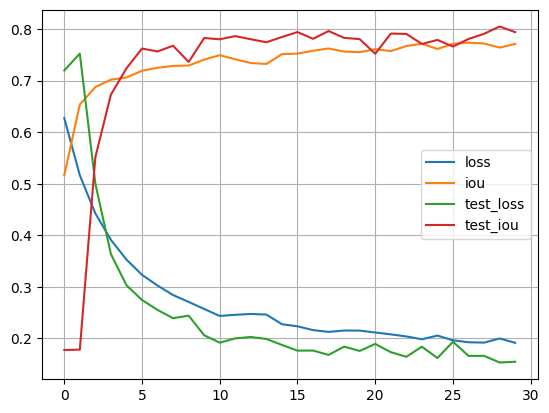

In [20]:
import pandas as pd
df = pd.DataFrame(hist)
df.plot(grid=True)
plt.show()

torch.Size([3, 394, 394])


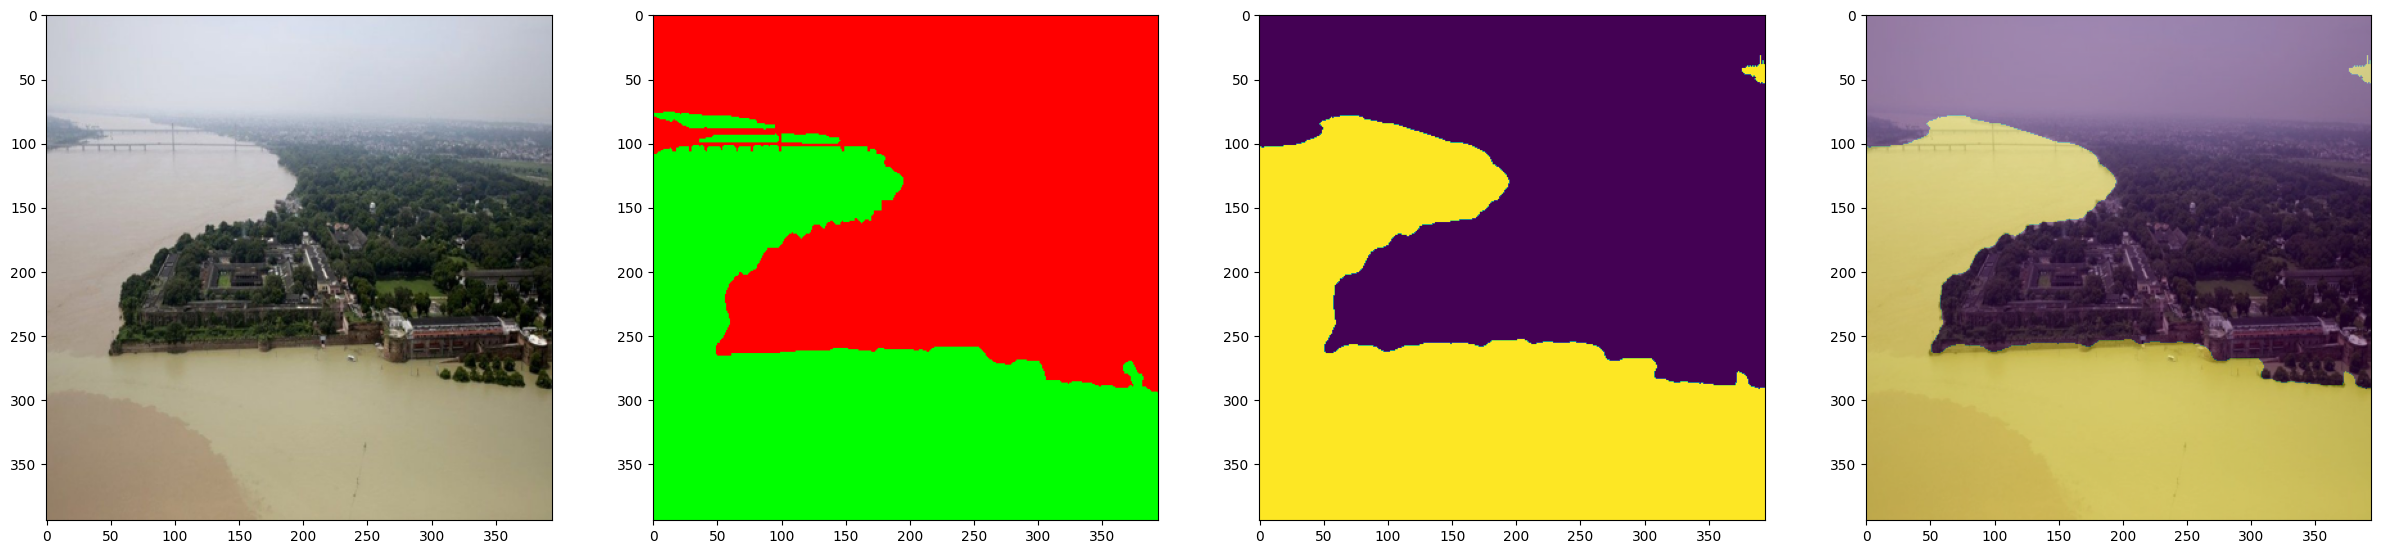

tensor([0, 1], device='cuda:0')
torch.Size([3, 394, 394])


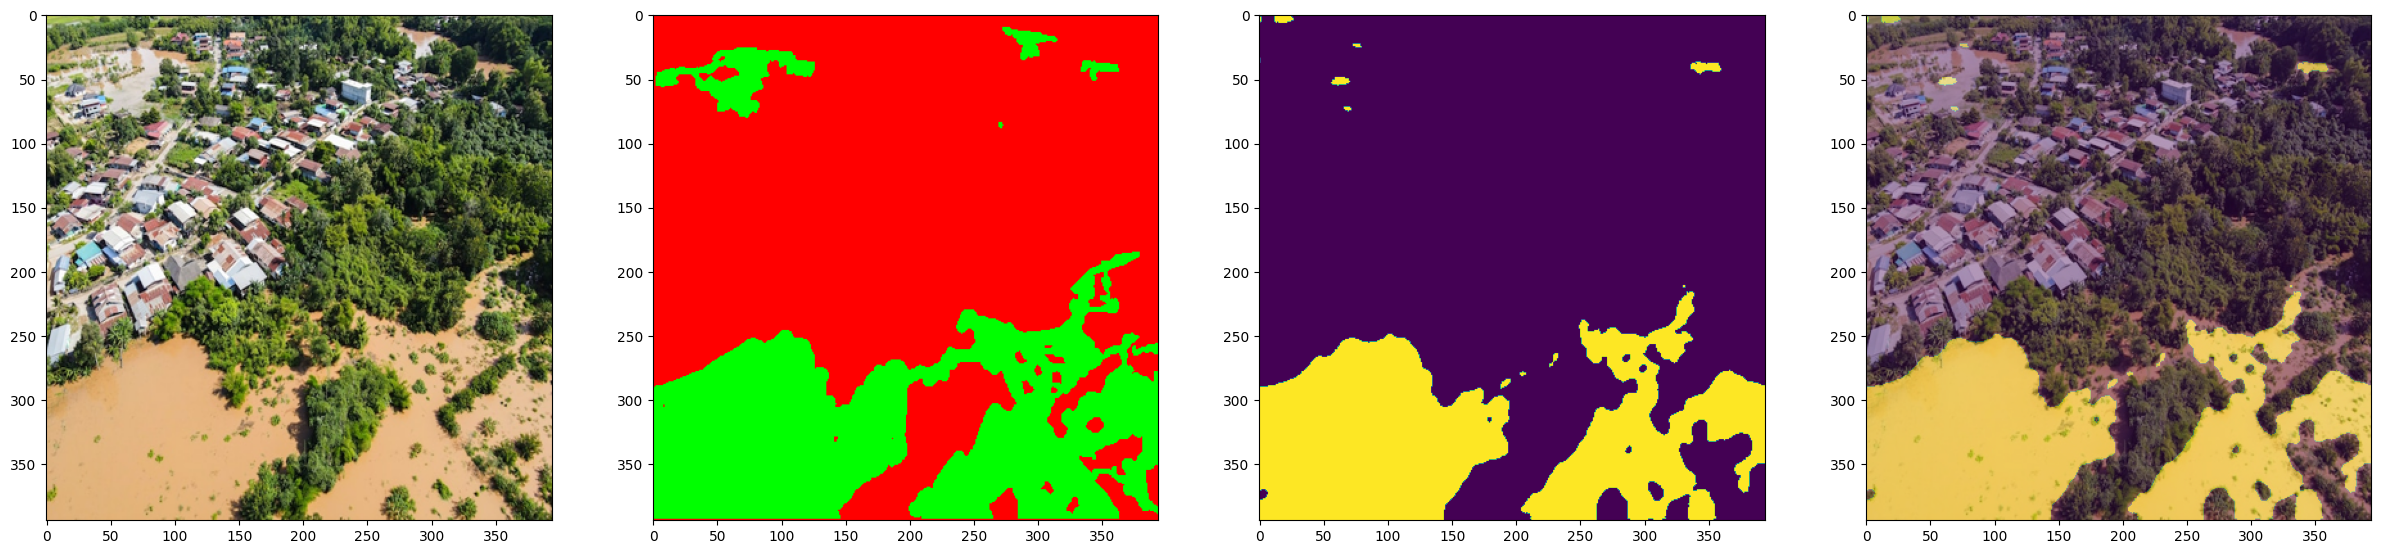

tensor([0, 1], device='cuda:0')
torch.Size([3, 394, 394])


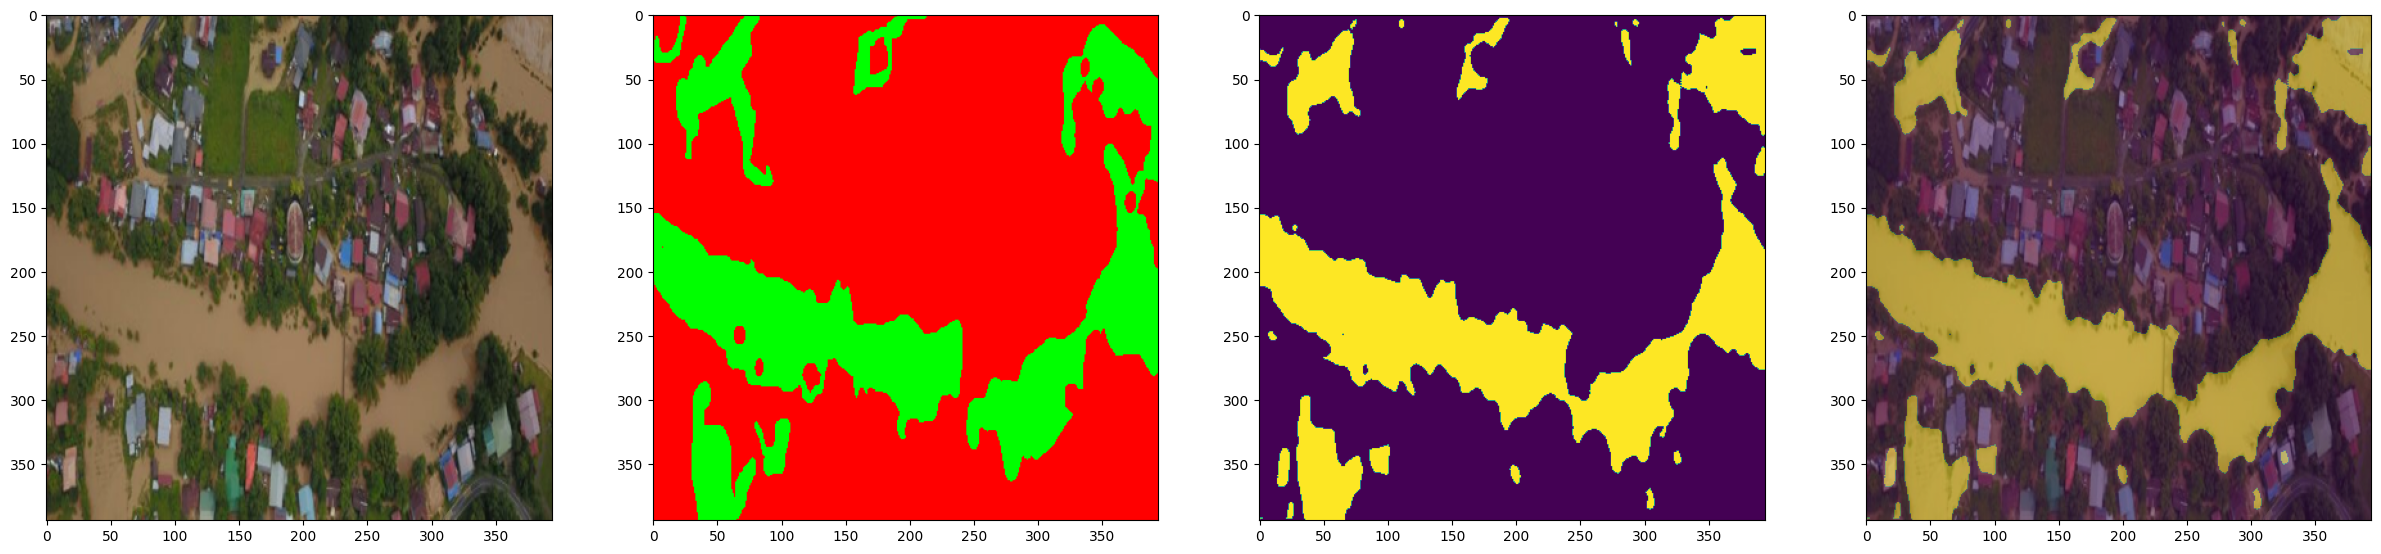

tensor([0, 1], device='cuda:0')
torch.Size([3, 394, 394])


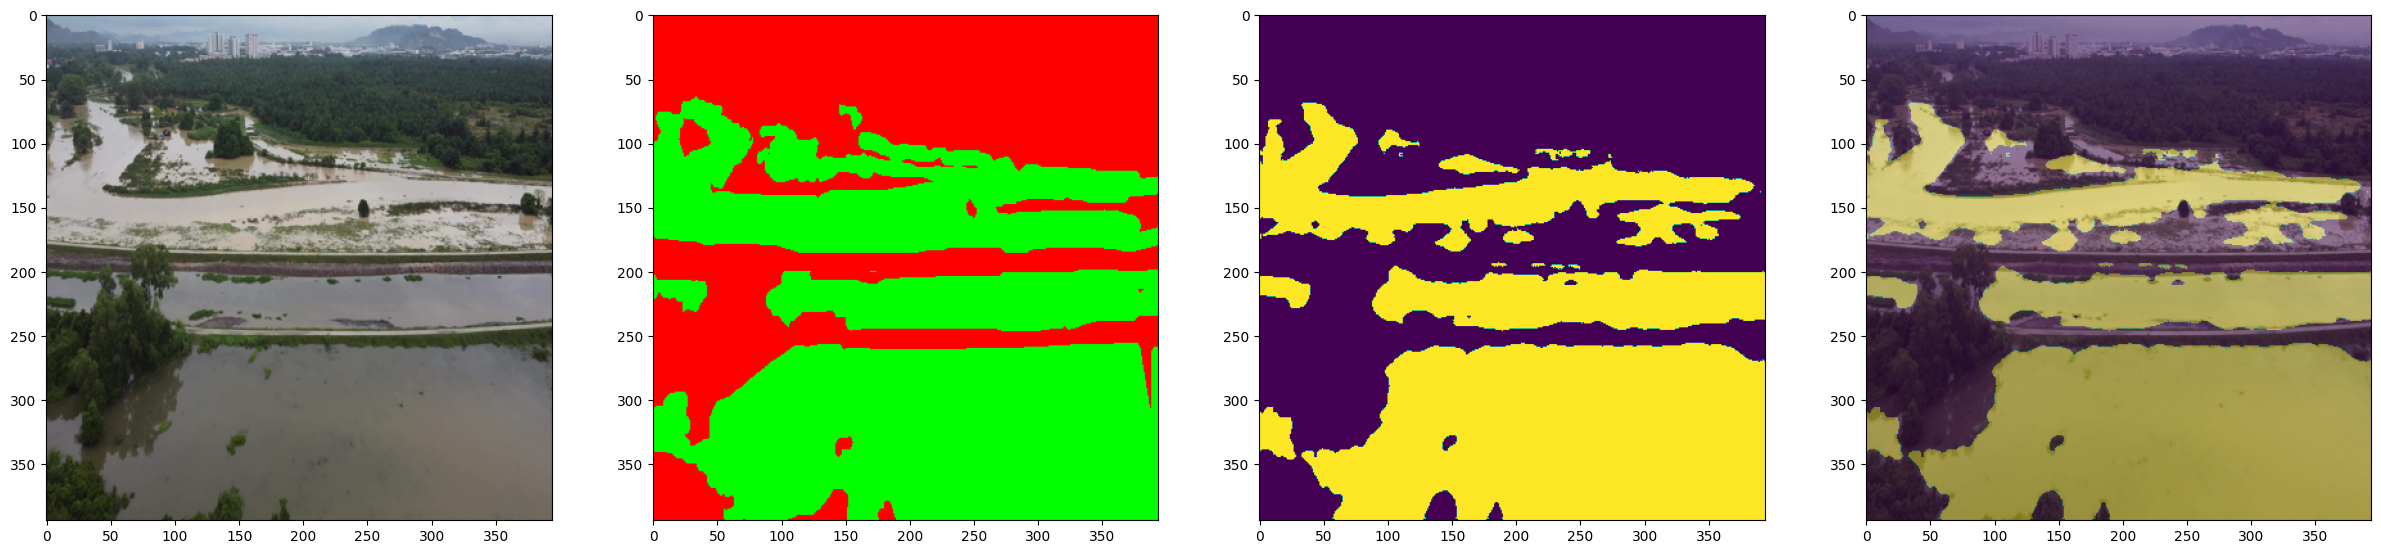

tensor([0, 1], device='cuda:0')
torch.Size([3, 394, 394])


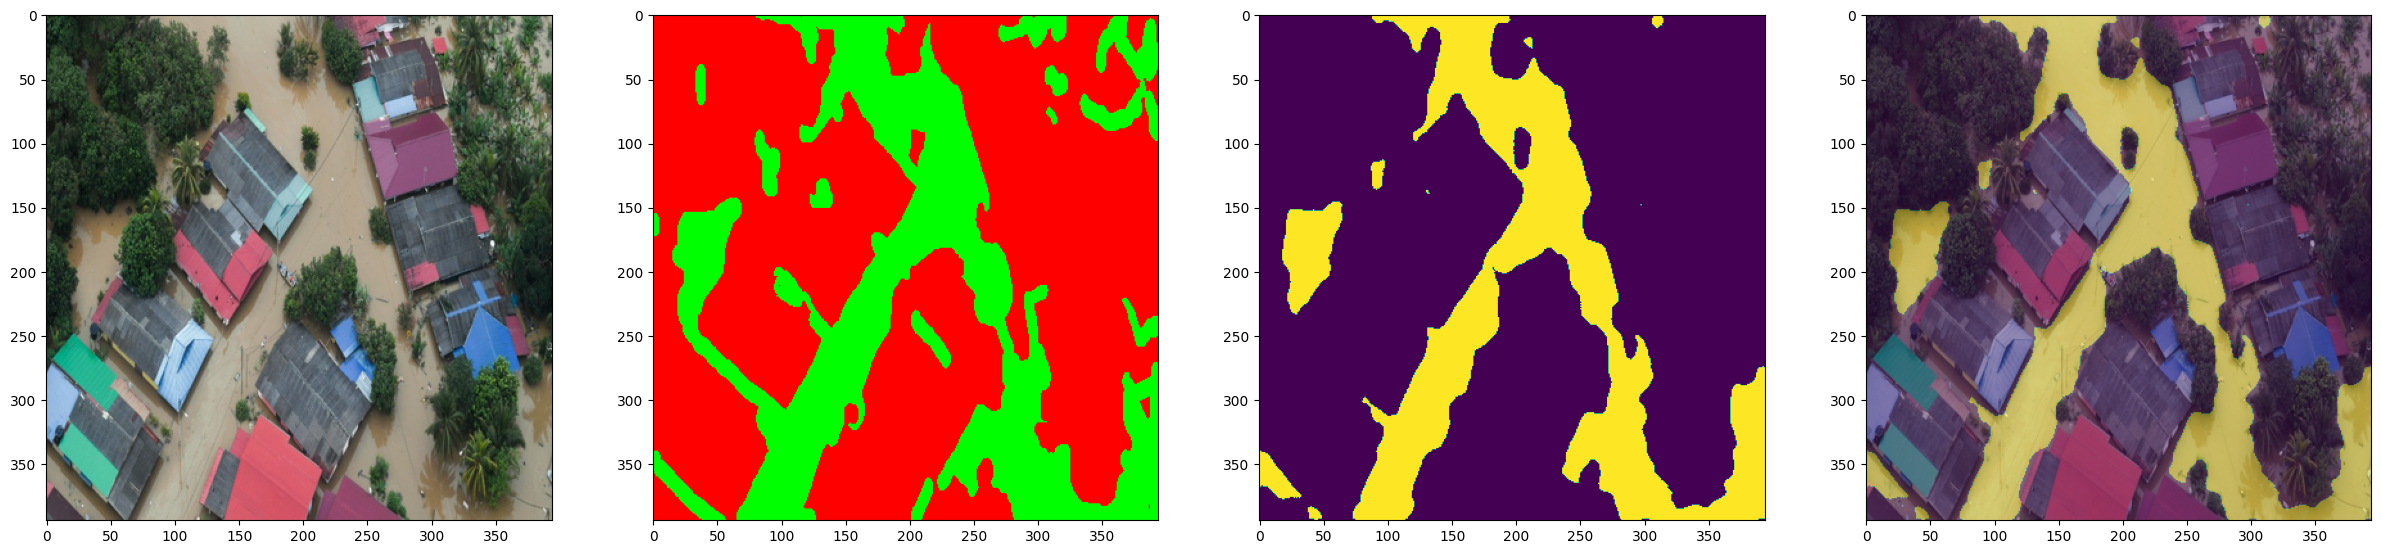

tensor([0, 1], device='cuda:0')


In [21]:
import random

model.eval()

for i in range(5):
  with torch.no_grad():
      ix = random.randint(0, len(dataset['test'])-1)
      img, mask = dataset['test'][ix]
      output = model(img.unsqueeze(0).to(device))[0]
      pred_mask = torch.argmax(output, axis=0)

  fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(30,10))
  ax1.imshow(img.permute(1, 2, 0).cpu().numpy())
  ax2.imshow(mask.permute(1, 2, 0).cpu().numpy())
  ax3.imshow(pred_mask.squeeze().cpu().numpy())
  ax4.imshow(img.permute(1, 2, 0).cpu().numpy())
  ax4.imshow(pred_mask.squeeze().cpu().numpy(), alpha=0.4)
  plt.show()

#Transfer Learning

In [22]:
import torchvision

class out_conv(torch.nn.Module):
    def __init__(self, ci, co, coo):
        super(out_conv, self).__init__()
        self.upsample = torch.nn.ConvTranspose2d(ci, co, 2, stride=2)
        self.conv = conv3x3_bn(ci, co)
        self.final = torch.nn.Conv2d(co, coo, 1)

    def forward(self, x1, x2):
        x1 = self.upsample(x1)
        diffX = x2.size()[2] - x1.size()[2]
        diffY = x2.size()[3] - x1.size()[3]
        x1 = F.pad(x1, (diffX, 0, diffY, 0))
        x = self.conv(x1)
        x = self.final(x)
        return x

class UNetResnet(torch.nn.Module):
    def __init__(self, n_classes=3, in_ch=3):
        super().__init__()

        self.encoder = torchvision.models.resnet18(pretrained=True)
        if in_ch != 3:
          self.encoder.conv1 = torch.nn.Conv2d(in_ch, 64, kernel_size=7, stride=2, padding=3, bias=False)

        self.deconv1 = deconv(512,256)
        self.deconv2 = deconv(256,128)
        self.deconv3 = deconv(128,64)
        self.out = out_conv(64, 64, n_classes)

    def forward(self, x):
        x_in = torch.tensor(x.clone())
        x = self.encoder.relu(self.encoder.bn1(self.encoder.conv1(x)))
        x1 = self.encoder.layer1(x)
        x2 = self.encoder.layer2(x1)
        x3 = self.encoder.layer3(x2)
        x = self.encoder.layer4(x3)
        x = self.deconv1(x, x3)
        x = self.deconv2(x, x2)
        x = self.deconv3(x, x1)
        x = self.out(x, x_in)
        return x

In [23]:
model = UNetResnet()
output = model(torch.randn((10,3,394,394)))
output.shape

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
<ipython-input-22-34d82ebe209c>:33: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x_in = torch.tensor(x.clone())


torch.Size([10, 3, 394, 394])

In [ ]:
model = UNetResnet()
hist = fit(model, dataloader, epochs=30)

  0%|          | 0/15 [00:00<?, ?it/s]<ipython-input-22-34d82ebe209c>:33: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x_in = torch.tensor(x.clone())
loss 0.66285 iou 0.50860:  33%|███▎      | 5/15 [00:05<00:10,  1.09s/it]

In [ ]:
import pandas as pd
df = pd.DataFrame(hist)
df.plot(grid=True)
plt.show()

In [ ]:
import random

model.eval()

for i in range(5):
  with torch.no_grad():
      ix = random.randint(0, len(dataset['test'])-1)
      img, mask = dataset['test'][ix]
      output = model(img.unsqueeze(0).to(device))[0]
      pred_mask = torch.argmax(output, axis=0)

  fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(30,10))
  ax1.imshow(img.permute(1, 2, 0).cpu().numpy())
  ax2.imshow(mask.permute(1, 2, 0).cpu().numpy())
  ax3.imshow(pred_mask.squeeze().cpu().numpy())
  ax4.imshow(img.permute(1, 2, 0).cpu().numpy())
  ax4.imshow(pred_mask.squeeze().cpu().numpy(), alpha=0.4)
  plt.show()